In [1]:
using Pkg
Pkg.add("CSV")
Pkg.add("DataFrames") 
Pkg.add("DynamicalSystems")
Pkg.add("CausalityTools")
Pkg.add("Plots")
Pkg.add("Statistics")
Pkg.add("LaTeXStrings")
Pkg.add("Interpolations")


 Resolving package versions...
  Updating `~/.julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.2/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.2/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.2/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.2/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.2/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.2/Manifest.toml`
 [no changes]
 Res

In [22]:
using CSV 
using DataFrames
using DynamicalSystems
using Statistics
using(LaTeXStrings)
using UncertainData, CausalityTools, Distributions, StatsBase, 
    Test, Interpolations, Plots

 Resolving package versions...
  Updating `~/.julia/environments/v1.2/Project.toml`
  [a98d9a8b] + Interpolations v0.12.10
  Updating `~/.julia/environments/v1.2/Manifest.toml`
 [no changes]


In [27]:

d = CSV.read("cli_div_interp.csv", DataFrame)

,age,cli,div
,Float64,Float64,Float64
1,0.0,0.0882534,0.00919866
2,0.0951586,0.08996,0.00968498
3,0.190317,0.0916666,0.0101713
4,0.285476,0.0933731,0.0106576
5,0.380634,0.0950797,0.0111439
6,0.475793,0.0967863,0.0116303
7,0.570952,0.0984928,0.0121166
8,0.66611,0.100199,0.0126029
9,0.761269,0.101906,0.0130892


┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[29]:1
└ @ Core In[29]:1
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[29]:3
└ @ Core In[29]:3
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[29]:4
└ @ Core In[29]:4


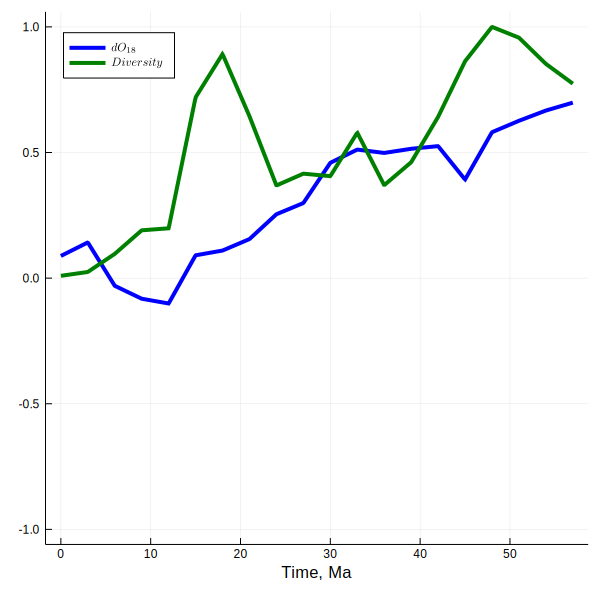

In [29]:
#Interpolated/binned in Julia
t = d["age"]
cli = d["cli"]
div = d["div"]
pl = plot(xlabel = "Time, Ma", ylabel = "",
    ylims = [-1, 1])
plot!(t, cli, label = L"dO_{18}", c = :blue, lw = 4)
plot!(t, div, label = L"Diversity", c = :green, lw = 4)

plot(pl, layout = grid(1, 1), size = (600, 600), legend = :topleft)


InterpolateAndBin{Linear}(Statistics.mean, 3.0:5.0:58.0, Linear(), 3.0:0.5:60.0, Flat(OnGrid()))

In [49]:
# Prediction lags
ηs = 1:20
npts = 20
binning = RectangularBinning(20)

# Use defaults, binning and prediction lags are required. 
# Note that `binning` and `ηs` are *mandatory* keyword arguments.
TransferOperatorGridTest(binning = binning, ηs = ηs)

# The other keywords can also be adjusted
TransferOperatorGridTest(k = 1, l = 2, binning = binning, ηs = ηs)

# Maximum prediction 
η_max = 40

# Embedding parameters (3-dimensional embedding)
k, l, m = 1, 1, 1

# Partition
n_subdivisions = floor(Int, npts^(1/(k + l + m + 1)))
bin_scheme = RectangularBinning(n_subdivisions)

#Transfer entropy test with base-2 logarithm, 
te_test = TransferOperatorGridTest(binning = bin_scheme, 
    ηs = -η_max:η_max, b = 2, k = k, l = l, m = m) 

# Predictive asymmetry test based on the transfer entropy test
test = PredictiveAsymmetryTest(predictive_test = te_test)

PredictiveAsymmetryTest{TransferOperatorGridTest{81},40}(predictive_test = TransferOperatorGridTest{81}(k = 1, l = 1, m = 1, n = 1, τ = 1, b = 2, estimator = TransferOperatorGrid(), binning_summary_statistic = mean, binning = RectangularBinning(2), ηs = -40:40))

In [52]:
influence_cli_div = causality(cli, div, test)
influence_div_cli = causality(div, cli, test)
plot(size = (900, 700), 
    tickfont = font(12), guidefont = font(12), legendfont = font(12), 
    xlabel = "Prediction lag", ylabel = "Predictive asymmetry (bits)"); 
plot!(1:η_max, influence_cli_div, c = :black, label = "cli -> div"); scatter!(1:η_max, influence_cli_div, c = :black, label = ""); 
plot!(1:η_max, influence_div_cli, c = :red, label = "div -> cli"); scatter!(1:η_max, influence_div_cli, c = :red, label = "")
hline!([0], ls = :dash, lc = :grey, label = "")
png("Causality_cli_div")


In [53]:
#d = CSV.read("cli_div_interp.csv", DataFrame)
#d = CSV.read("ecol.csv", DataFrame)


# Prediction lags
npts = 200
ηs = 1:8
binning = RectangularBinning(8)

# Use defaults, binning and prediction lags are required. 
# Note that `binning` and `ηs` are *mandatory* keyword arguments.
TransferOperatorGridTest(binning = binning, ηs = ηs)

# The other keywords can also be adjusted
TransferOperatorGridTest(k = 1, l = 2, binning = binning, ηs = ηs)
# Maximum prediction 
η_max = 8

# Embedding parameters (3-dimensional embedding)
k, l, m = 1, 1, 1

# Partition
n_subdivisions = floor(Int, npts^(1/(k + l + m + 1)))
bin_scheme = RectangularBinning(n_subdivisions)

#Transfer entropy test with base-2 logarithm, 
te_test = TransferOperatorGridTest(binning = bin_scheme, 
    ηs = -η_max:η_max, b = 2, k = k, l = l, m = m) 

# Predictive asymmetry test based on the transfer entropy test
test = PredictiveAsymmetryTest(predictive_test = te_test)
pa_test = PredictiveAsymmetryTest(predictive_test = te_test)
#pa_cli = causality(d["cli"], d["div"], pa_test)
#pa_div = causality(d["div"], d["cli"], pa_test)

#pa_hl = causality(d["Hare"], d["Lynx"], pa_test)
#pa_lh = causality(d["Lynx"], d["Hare"], pa_test)
#pa_ph = causality(d["precip"], d["Hare"], pa_test)

pa_pred = causality(d["pred_div"], d["herb_div"], pa_test)
pa_herb = causality(d["herb_div"], d["pred_div"], pa_test)
pa_cli = causality(d["smoothed"], d["herb_div"], pa_test)


p_xy = plot(xlabel = "Prediction lag", ylabel = L"\mathbb{A} (bits)",
    ylims = [-1, 1])
#plot!(1:maximum(ηs), pa_hl, label = L"Hare \to Lynx", c = :green, lw = 4)
#plot!(1:maximum(ηs), pa_lh, label = L"Lynx \to Hare", c = :red, lw = 4)
#plot!(1:maximum(ηs), pa_ph, label = L"Precip. \to Hare", c = :blue, lw = 4)
plot!(1:maximum(ηs), pa_pred, label = L"Pred. \to herbiv.", c = :red, lw = 4)
plot!(1:maximum(ηs), pa_herb, label = L"Herbiv. \to pred.", c = :green, lw = 4)
plot!(1:maximum(ηs), pa_cli, label = L"Climate. \to herb.", c = :blue, lw = 4)
hline!([0], lw = 2, ls = :dot, α = 0.5, c = :black, label = "")

#p_yz = plot(xlabel = "Prediction lag", ylabel = L"\mathbb{A} (bits)",
#    ylims = [-0.8, 0.8])
#plot!(1:maximum(ηs), pa_O_RR, label = L"y \to z", c = :red)
#plot!(1:maximum(ηs), pa_RR_O, label = L"z \to y", c = :blue)
#hline!([0], lw = 2, ls = :dot, α = 0.5, c = :black, label = "")


plot(p_xy, layout = grid(1, 1), size = (600, 600), legend = :topleft)





┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[53]:33
└ @ Core In[53]:33


ArgumentError: [91mArgumentError: column name :pred_div not found in the data frame[39m